In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import sklearn
import datetime

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
from scipy import stats
from statistics import mean

In [4]:
def calc_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def r_squared(y_real, y_predicted):
    
    # calculate the numerator
    num = sq_err(y_real, y_predicted)
    # calculate the denominator
    denom = np.sum((y_real - y_real.mean())**2)
    
    return 1 - num/denom

def sq_err(y_real, y_predicted):
    squarred_error = np.sum((y_real - y_predicted)**2)
    return squarred_error


In [72]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

In [7]:
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv', dtype = kc_dtypes, parse_dates = ['date'])

kc_data['sqft_basement'] = kc_data['sqft_basement'].replace({'?': 0})
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')
#single home with 33 rooms is an outlier for sure 
kc_data = kc_data.drop(index= 15856)

In [8]:
#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data['waterfront'] = kc_data['waterfront'].fillna(146/19221)
kc_data['view'] = kc_data['view'].fillna((957 + (508*2) + (330*3) + (317*4))/21534)
kc_data['yr_renovated'] = kc_data['waterfront'].fillna(0)

In [9]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int32         
 1   date           21596 non-null  datetime64[ns]
 2   price          21596 non-null  float64       
 3   bedrooms       21596 non-null  int32         
 4   bathrooms      21596 non-null  float64       
 5   sqft_living    21596 non-null  int32         
 6   sqft_lot       21596 non-null  int32         
 7   floors         21596 non-null  float64       
 8   waterfront     21596 non-null  float64       
 9   view           21596 non-null  float64       
 10  condition      21596 non-null  float64       
 11  grade          21596 non-null  int32         
 12  sqft_above     21596 non-null  int32         
 13  sqft_basement  21596 non-null  float64       
 14  yr_built       21596 non-null  int32         
 15  yr_renovated   2159

In [10]:
z_score = stats.zscore(kc_data[['sqft_basement']])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
kc_data['basement_z'] = kc_data['sqft_basement'][filtered_entries]
kc_data = kc_data.dropna(axis=0)

In [13]:
z_score = stats.zscore(kc_data[['sqft_above']])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
kc_data['sqft_above_z'] = kc_data['sqft_above'][filtered_entries]
kc_data = kc_data.dropna(axis=0)

In [14]:
z_score = stats.zscore(kc_data[['price']])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
kc_data['price'] = kc_data['price'][filtered_entries]
kc_data = kc_data.dropna(axis=0)

In [15]:
# seperate your x and y, here I am looking at price, also need to get rid of date
kcy = kc_data['price'].to_frame()
kcx = kc_data[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']]

In [16]:
# initialize regression
reg = linear_model.LinearRegression()

In [17]:
# split data into 80/20 training/testing
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [18]:
# train the model 
reg.fit(x_train, y_train)

LinearRegression()

In [34]:
grade_test.mean()

7.5188223938223935

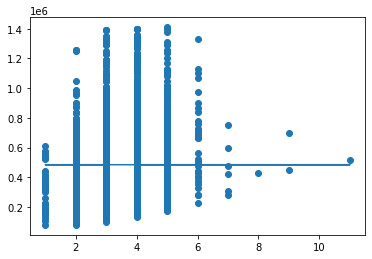

In [73]:
grade_test = x_test['bedrooms'].to_numpy(dtype=float)
price_test = y_test.to_numpy(dtype=float)


m, b = best_fit_slope_and_intercept(grade_test, price_test)
regression_line = [(m*x)+b for x in price_test]

plt.scatter(grade_test, price_test)
plt.plot(grade_test, regression_line)

In [74]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred = y_pred.round(decimals=2)

In [79]:
b

485105.8631008463

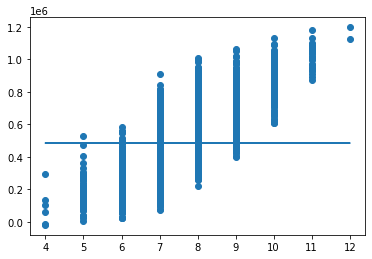

In [76]:
grade_test = x_test['grade'].to_numpy(dtype=float)
price_test = y_pred


m, b = best_fit_slope_and_intercept(grade_test, price_test)
regression_line = [(m*x)+b for x in grade_test]
plt.plot(grade_test, regression_line)
plt.scatter(grade_test, price_test)

485105.8631008642


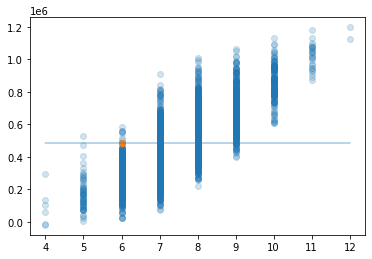

In [77]:
predict_x = 6
predict_y = (m*predict_x)+b
print(predict_y)

plt.plot(grade_test, regression_line, alpha=.3)
plt.scatter(grade_test, price_test, alpha=.2)
plt.scatter(6, predict_y, alpha=1)

In [52]:
# check accuracy with mean sq 
print('mean sq :', np.mean((y_pred - y_test)**2))
print('slope :', calc_slope(y_test, y_pred))

mean sq : price    1.674657e+10
dtype: float64
slope : price    0.690384
dtype: float64


In [ ]:
cv = KFold(n_splits=10)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_test = cross_val_predict(classifier_pipeline, x_test, y_test, cv=5)
k_train = cross_val_predict(classifier_pipeline, x_train, y_train, cv=5)

In [ ]:
print('test RMSE:  ' + str(round(sqrt(mean_squared_error(y_test, k_test)), 2)))
print('test R Squared: ' + str(round(r2_score(y_test, k_test), 2)))
print('test Slope: ' + str(calc_slope(y_test, k_test)))

In [ ]:
print('pred RMSE:  ' + str(round(sqrt(mean_squared_error(y_train, k_train)), 2)))
print('pred R Squared: ' + str(round(r2_score(k_train, y_train), 2)))
print('pred Slope: ' + str(calc_slope(k_train, y_train)))

In [ ]:
plt.scatter(kcx['bedrooms'], kcy, alpha=.02)
plt.plot(x_test, y_pred, linewidth= 3, alpha=.03)

In [ ]:
kc_data

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()